Sources:
https://prastuti.medium.com/twitter-sentiment-analysis-on-covid-19-using-vader-82f030b686a9
https://github.com/cjhutto/vaderSentiment

In [134]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px

Extracting first 100 rows for practise sentiment analysis

In [120]:
tweetsDf = pd.read_csv("twitterDataOutput.csv", nrows=1500)
print("dataframe shape: " + str(tweetsDf.shape) )

tweetsDf.head

dataframe shape: (1500, 3)


<bound method NDFrame.head of                           date                   id  \
0     2022-05-31T23:14:24.000Z  1531776135083720711   
1     2022-05-31T22:17:29.000Z  1531761813922136065   
2     2022-05-31T22:09:18.000Z  1531759753071845376   
3     2022-05-31T22:05:43.000Z  1531758850273050626   
4     2022-05-31T22:04:05.000Z  1531758441521467395   
...                        ...                  ...   
1495  2022-05-24T12:55:03.000Z  1529083554948333569   
1496  2022-05-24T12:53:02.000Z  1529083048381276160   
1497  2022-05-24T12:51:05.000Z  1529082558302064641   
1498  2022-05-24T12:46:08.000Z  1529081312577036291   
1499  2022-05-24T12:37:33.000Z  1529079154121003012   

                                                                                                                                                                                                                                                                                                                   tw

In [121]:
# print(type(tweetsDf['scores'][1]['compound']))
# print(tweetsDf['scores'][1]['compound'])


In [122]:
def cleanTweet(tweet):
    # remove mentions
    cleanTweet = re.sub("(@[A-Za-z0-9_]+)","", tweet)
    # remove urls
    cleanTweet = re.sub("https?://[A-Za-z0-9./]*","", cleanTweet)
    # remove whitespaces
    cleanTweet = ' '.join(cleanTweet.split())
    # replace &amp; with &
    cleanTweet = re.sub("&amp;", "and", cleanTweet)
    return cleanTweet

In [123]:
tweetsDf['cleanTweet'] = tweetsDf['tweet'].apply(lambda x:cleanTweet(x))

In [124]:
pd. set_option('display.max_rows', 10)
pd. set_option('display.max_columns', None)
pd. set_option('display.width', None)
pd. set_option('display.max_colwidth', None)
tweetsDf

,date,id,tweet,cleanTweet
0,2022-05-31T23:14:24.000Z,1531776135083720711,"@FilipinoFollies It’s outdated. 3rd has negative connotations like the Philippines is somehow in 3rd place, Filipinos are in fact winning, at least those Filipinos who are not negative like yourself sir.","It’s outdated. 3rd has negative connotations like the Philippines is somehow in 3rd place, Filipinos are in fact winning, at least those Filipinos who are not negative like yourself sir."
1,2022-05-31T22:17:29.000Z,1531761813922136065,A Japan song title feeling very topical at the moment. So is the B-side unfortunately. https://t.co/OkAqdLGwxH,A Japan song title feeling very topical at the moment. So is the B-side unfortunately.
2,2022-05-31T22:09:18.000Z,1531759753071845376,"@FurnaceFear @Jo_dB Although it cuts off before my favourite line from Adolf Martin 'and you see, I think it all started going wrong when the Japanese arrived....'","Although it cuts off before my favourite line from Adolf Martin 'and you see, I think it all started going wrong when the Japanese arrived....'"
3,2022-05-31T22:05:43.000Z,1531758850273050626,#Bradford is trending on @Twitter! We have been waiting for #CityofCulture2025 It's our place &amp; our time @FoxandWindmill the UK's first indie publisher for British South Asians is based right here in #Bradford and we'll always back our beautiful city as proud Bradfordians🦊 https://t.co/5bg3y8tXaN,#Bradford is trending on ! We have been waiting for #CityofCulture2025 It's our place and our time the UK's first indie publisher for British South Asians is based right here in #Bradford and we'll always back our beautiful city as proud Bradfordians🦊
4,2022-05-31T22:04:05.000Z,1531758441521467395,This was a light day in Vietnam back in my World At War days during game chat. Sorry Kat. https://t.co/BHYEVC7jyL,This was a light day in Vietnam back in my World At War days during game chat. Sorry Kat.
...,...,...,...,...
1495,2022-05-24T12:55:03.000Z,1529083554948333569,The Container Ship Cosco Japan has just set sail for Antwerp (Track: https://t.co/T3Hxi9PdiJ) #CoscoJapan,The Container Ship Cosco Japan has just set sail for Antwerp (Track: ) #CoscoJapan
1496,2022-05-24T12:53:02.000Z,1529083048381276160,The Container Ship Cosco Japan is mooring #CoscoJapan,The Container Ship Cosco Japan is mooring #CoscoJapan
1497,2022-05-24T12:51:05.000Z,1529082558302064641,Calling on assistance from West Lothian Chinese community: Have you been renovating your kitchens or shop? Are you aware of the end destination of your old fridges? If not and you recognise the photos its waiting for u in East Whitburn. Please come and remove it! @LoveWestLothian https://t.co/HEDL9Hs8c5,Calling on assistance from West Lothian Chinese community: Have you been renovating your kitchens or shop? Are you aware of the end destination of your old fridges? If not and you recognise the photos its waiting for u in East Whitburn. Please come and remove it!
1498,2022-05-24T12:46:08.000Z,1529081312577036291,"@kelsrael @volunteering_uk @tukshopuk @grantshapps @transportgovuk @CharlotteV @Warwickshire_CC @NBBCouncil @highsheriffwar2 The last time I rode in one was Pattaya in Thailand, who on earth brought them to UK, they're really nippy!","The last time I rode in one was Pattaya in Thailand, who on earth brought them to UK, they're really nippy!"


In [125]:
# carrying out sentiment analysis using VADER on each cleanTweet
analyzer = SentimentIntensityAnalyzer()
tweetsDf['scores'] = tweetsDf['cleanTweet'].apply(lambda x: analyzer.polarity_scores(x))

In [126]:
# assinging a label: positive, negative, or neutral
def labelSentiment(scoreDictionary):
    compoundScore = scoreDictionary['compound']
    if compoundScore >= 0.05:
        return "positive"
    elif compoundScore <= -0.05:
        return "negative"
    else:
        return "neutral"

In [127]:
tweetsDf['label'] = tweetsDf['scores'].apply(lambda x: labelSentiment(x))

In [128]:
positiveTweets = tweetsDf[tweetsDf['label'] == 'positive']
negativeTweets = tweetsDf[tweetsDf['label'] == 'negative']
neutralTweets = tweetsDf[tweetsDf['label'] == 'neutral']

print("number of positive tweets: " + str(positiveTweets.shape[0]))
print("number of negative tweets: " + str(negativeTweets.shape[0]))
print("number of neutral tweets: " + str(neutralTweets.shape[0]))

number of positive tweets: 760
number of negative tweets: 361
number of neutral tweets: 379


c:\Users\olija\Documents\GitHub\CSCM20_Project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Number of positive, negative, and neutral tweets')]

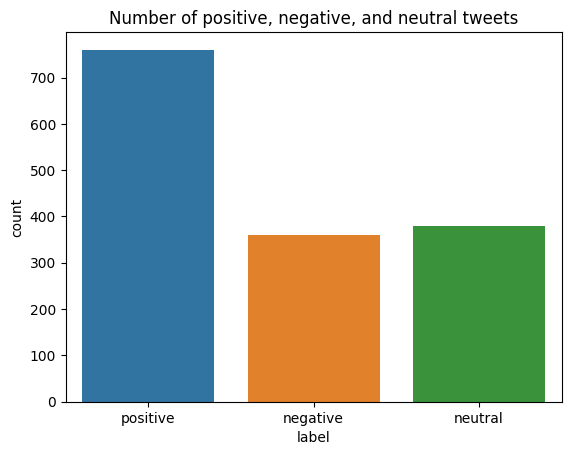

In [129]:
sns.countplot(tweetsDf['label'], label= 'count').set(title='Number of positive, negative, and neutral tweets')

In [130]:
print(type(tweetsDf))

<class 'pandas.core.frame.DataFrame'>


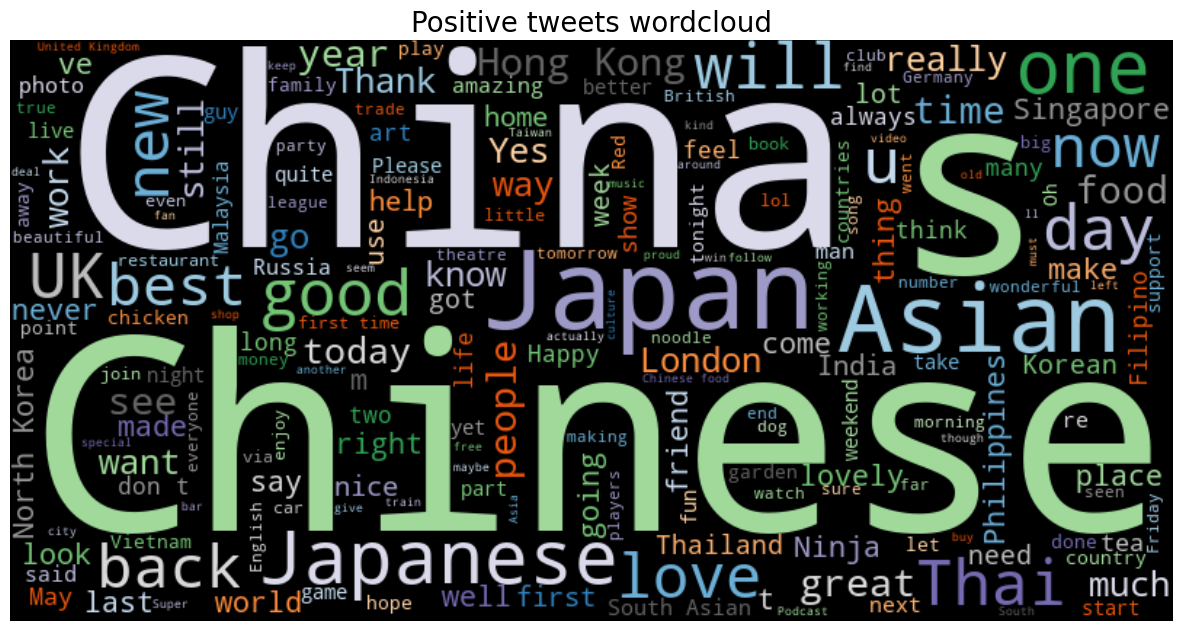

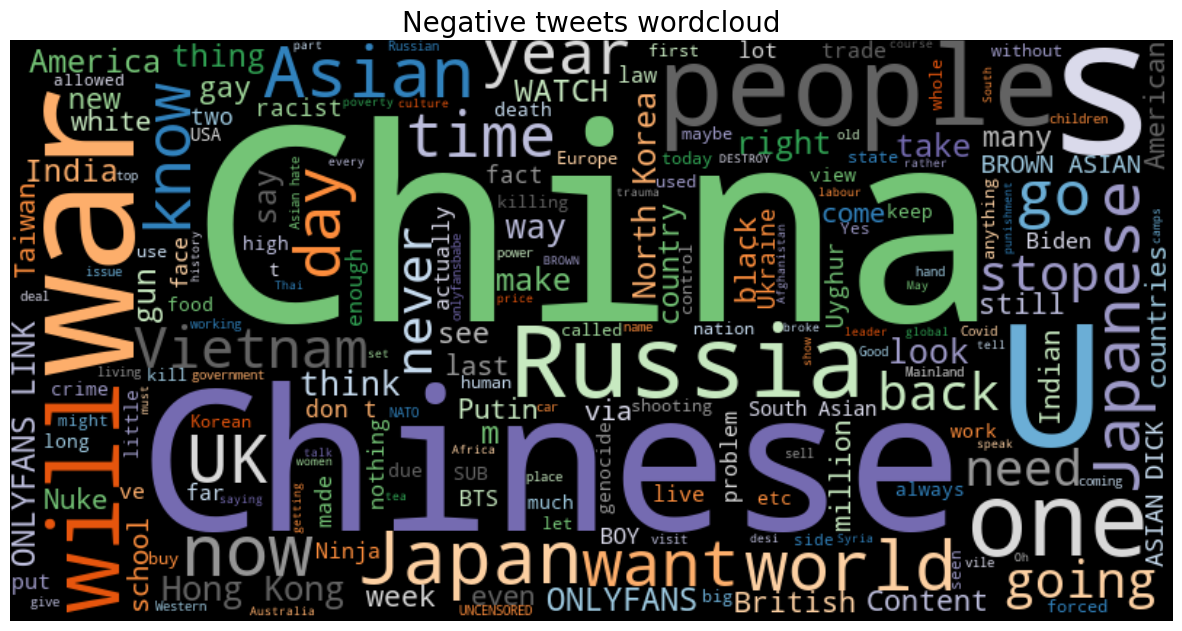

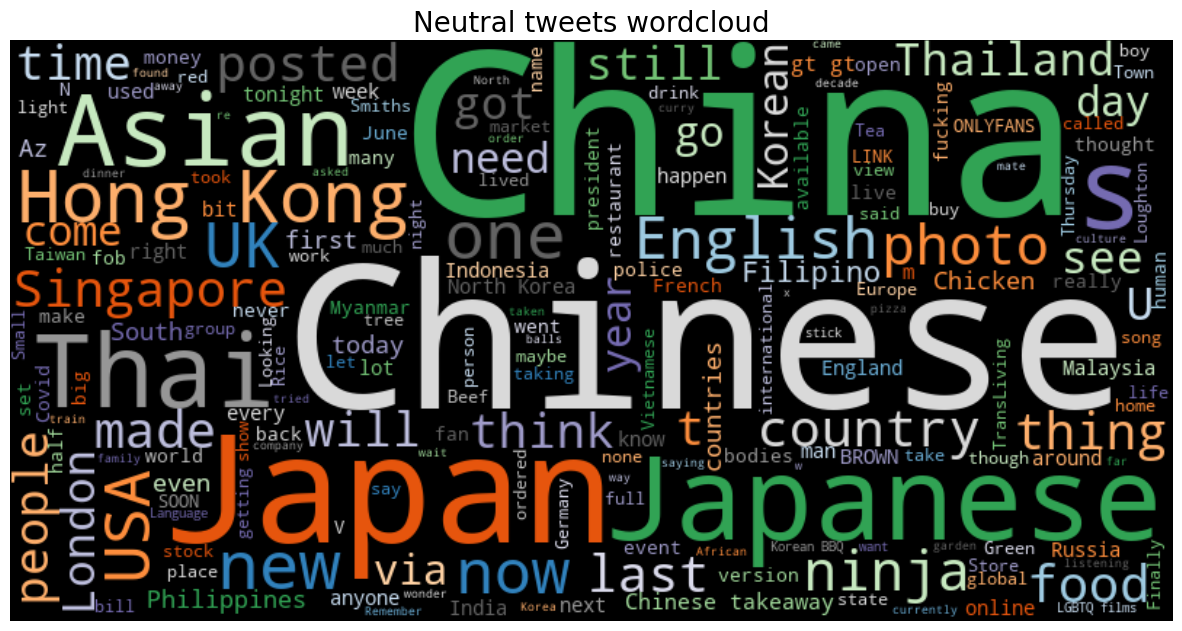

In [131]:

def tweetsDfToWC(df, title):
    tweets_list = df['cleanTweet'].tolist()
    tweets_string = " ".join(tweets_list)
    wc = WordCloud(width=800, height=400, background_color='black', colormap='tab20c').generate(tweets_string)
    plt.figure(figsize = (15,15))
    plt.title(title, fontsize = 20)
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
   
tweetsDfToWC(positiveTweets, "Positive tweets wordcloud")
tweetsDfToWC(negativeTweets, "Negative tweets wordcloud")
tweetsDfToWC(neutralTweets, "Neutral tweets wordcloud")
    


In [132]:
def floorDate(dateString):
    shortDateStr = dateString[:10]
    shortDateFormat = "%Y-%m-%d"
    return datetime.strptime(shortDateStr, shortDateFormat)

tweetsDf['day'] = tweetsDf['date'].apply(lambda x: floorDate(x))

In [136]:
aggregate = {'cnt': ('id', 'count')}
sentimentOverTimeDf = tweetsDf.groupby(['day', 'label']).agg(**aggregate).reset_index()
sentimentOverTimeDf


,day,label,cnt
0,2022-05-24,negative,25
1,2022-05-24,neutral,38
2,2022-05-24,positive,57
3,2022-05-25,negative,56
4,2022-05-25,neutral,50
...,...,...,...
19,2022-05-30,neutral,55
20,2022-05-30,positive,107
21,2022-05-31,negative,50
22,2022-05-31,neutral,52


In [138]:
fig = px.line(sentimentOverTimeDf, x='day', y='cnt', color='label')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed